# STEP 2: EDA

#### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
from scipy.stats import boxcox
from scipy.stats import f_oneway
from sklearn.preprocessing import PowerTransformer

#### Surpressing warnings

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

##### Changing the displaying settings (output cell not scrollable)

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

#### Loading Data

In [4]:
# Load the training and testing datasets from the previous step 
data_train = pd.read_csv('data_train_1.csv')
data_test = pd.read_csv('data_test_1.csv')

#### Summary Statistics

In [5]:
# Summary Statistics for Numerical Features
data_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
transmission_manual,50000.0,0.665540,0.471806,0.0,0.0,1.0,1.0,1.0
odometer_value,50000.0,249219.881980,136361.343789,0.0,158000.0,250000.0,325000.0,1000000.0
age_of_car,50000.0,16.054380,8.067141,0.0,10.0,16.0,21.0,77.0
engine_electric,50000.0,0.000300,0.017318,0.0,0.0,0.0,0.0,1.0
engine_gasoline,50000.0,0.666480,0.471475,0.0,0.0,1.0,1.0,1.0
engine_capacity,50000.0,2.056877,0.675006,0.2,1.6,2.0,2.3,8.0
has_warranty,50000.0,0.011420,0.106254,0.0,0.0,0.0,0.0,1.0
ownership_new,50000.0,0.011260,0.105515,0.0,0.0,0.0,0.0,1.0
ownership_owned,50000.0,0.979120,0.142984,0.0,1.0,1.0,1.0,1.0
front_drive,50000.0,0.720240,0.448886,0.0,0.0,1.0,1.0,1.0


<body>

<h3>Statistics Summary Overview</h3>

<ul>
  <li><b>transmission_manual:</b> Most of the cars in the dataset have a manual transmission (around 66.6%).</li>
  <li><b>odometer_value:</b> The mileage of cars ranges from 0 to 1,000,000 km, with a median of 250,000 km. There are cars with 0 km, which might indicate new cars or a data entry error.</li>
  <li><b>age_of_car:</b> The age of cars ranges from 0 to 77 years, with a median of 16 years. Cars with 0 years might be brand new.</li>
  <li><b>engine_electric</b> and <b>engine_gasoline</b>: Most of the cars have a gasoline engine (around 66.6%), and a very small fraction have an electric engine (0.03%). The rest are diesel cars</li>
  <li><b>engine_capacity:</b> The engine capacity ranges from 0.2 to 8.0 liters.</li>
  <li><b>has_warranty:</b> Only 1.14% of the cars have a warranty.</li>
  <li><b>ownership_new</b> and <b>ownership_owned</b>: Most of the cars are owned (97.9%), and a small fraction are new (1.12%). The rest are <b>ownership_emergency</b></li>
  <li><b>front_drive</b> and <b>rear_drive</b>: Most of the cars have front-wheel drive (72%), and some have rear-wheel drive (14%). The rest are <b>all_drive</b></li>
  <li><b>is_exchangeable:</b> Around 35.3% of the cars are exchangeable.</li>
  <li><b>number_of_photos:</b> The number of photos available for the cars ranges from 1 to 86, with a median of 8.</li>
  <li><b>number_of_maintenance:</b> The number of maintenance records ranges from 1 to 1273, indicating a wide variation in maintenance history.</li>
  <li><b>duration_listed:</b> The duration the cars have been listed for sale ranges from 0 to 2232 days, with a median of 59 days. Cars listed for 0 days might have been sold immediately or indicate a data entry error.</li>
  <li><b>price_usd:</b> The price of the cars ranges from 1 to 50,000, with a median of 4,800. The $1 price might be a placeholder or indicate an auction starting price.</li>
</ul>

</body>

##### Since there are cars that are very low priced, and given that the data is obtained from advertisments, it's likely that the low priced cars are not accurate. Let's analyze:

In [39]:
# Filter and analyze cars with price less than $300
low_priced_cars = data_train[data_train['price_usd'] < 300]

# Display basic statistics and the first few rows of low priced cars
summary_low_priced = low_priced_cars.describe()
low_priced_cars_head = low_priced_cars.head()

summary_low_priced

,transmission_manual,odometer_value,age_of_car,engine_electric,engine_gasoline,engine_capacity,has_warranty,ownership_new,ownership_owned,front_drive,rear_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
count,345.000000,345.000000,345.000000,345.0,345.000000,345.000000,345.0,345.0,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,0.968116,271110.962319,28.623188,0.0,0.881159,1.600580,0.0,0.0,0.730435,0.715942,0.284058,0.307246,5.484058,17.617391,72.214493,213.491130
std,0.175947,219203.698921,5.534515,0.0,0.324071,0.312529,0.0,0.0,0.444378,0.451620,0.451620,0.462022,3.233258,49.083327,124.854382,64.825389
min,0.000000,1.000000,11.000000,0.0,0.000000,0.800000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,100000.000000,25.000000,0.0,1.000000,1.400000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,13.000000,190.110000
50%,1.000000,245000.000000,28.000000,0.0,1.000000,1.600000,0.0,0.0,1.000000,1.000000,0.000000,0.000000,5.000000,2.000000,32.000000,226.890000
75%,1.000000,350000.000000,32.000000,0.0,1.000000,1.800000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,7.000000,10.000000,72.000000,250.000000
max,1.000000,1000000.000000,56.000000,0.0,1.000000,2.900000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,21.000000,393.000000,749.000000,299.630000


<body>

<h2>Summary Statistics of Low Priced Cars</h2>

<table style="width:100%">
<thead>
<tr>
<th>Feature</th>
<th>Value</th>
</tr>
</thead>
<tbody>
<tr>
<td>Count</td>
<td>345</td>
</tr>
<tr>
<td>Odometer Value (average)</td>
<td>271,110 miles</td>
</tr>
<tr>
<td>Engine Capacity (average)</td>
<td>1.6 liters</td>
</tr>
<tr>
<td>Number of Photos (average)</td>
<td>5 per listing</td>
</tr>
<tr>
<td>Duration Listed (average)</td>
<td>56 days</td>
</tr>
<tr>
<td>Age of Car (average)</td>
<td>16 years</td>
</tr>
</tbody>
</table>

<h2>Observations from the First Few Rows</h2>

<ul>
<li>Transmission: Most of these low priced cars have a manual transmission.</li>
<li>Ownership: A majority are owned, not new.</li>
<li>Type of Drive: Most have front wheel drive.</li>
<li>Maintenance and Photos: The number of maintenance events and photos varies.</li>
</ul>

<h2>Reasons for Low Prices</h2>

<ul>
<li>High mileage</li>
<li>Older age</li>
<li>Potentially less desirable features (e.g., manual transmission for some markets)</li>
<li>May require more maintenance or have other issues not captured in the dataset</li>
</ul>

</body>

However, even with all of these reasons, it is not reasonable to list the cars very low as the actual selling price. For example, some sellers might put 1 USD so that the serious buyers only contact them. And possibly some might be a scam. To avoid this, Let's remove the rows that are **less than 200 USD**

In [6]:
# Remove rows where the price is less than $200 USD
data_train = data_train[data_train['price_usd'] >= 200]

#### Summary Statistics for categorical features

In [7]:
# Summary Statistics for Categorical Features
categorical_features = data_train.select_dtypes(include=['object']).columns
data_train[categorical_features].describe().transpose()

,count,unique,top,freq
manufacturer_name,49912,55,Volkswagen,5475
color,49912,12,black,9972
body_type,49912,12,sedan,16861


<ul>
  <li><b>manufacturer_name:</b> There are 55 unique car manufacturers in the dataset. The most common manufacturer is Volkswagen, appearing 5,478 times.</li>
  <li><b>color:</b> There are 12 unique colors listed. The most common color is black, appearing 9,979 times.</li>
  <li><b>body_type:</b> There are 12 unique body types. The most common body type is sedan, appearing 16,910 times.</li>
</ul>

## Distribution

#### Visualizing the non-binary numerical features

In [11]:
# Identifying numerical non-binary features
numerical_features = data_train.select_dtypes(include=['int64', 'float64']).columns
# Identify all binary features
binary_features = [col for col in data_train.columns if data_train[col].nunique() == 2]

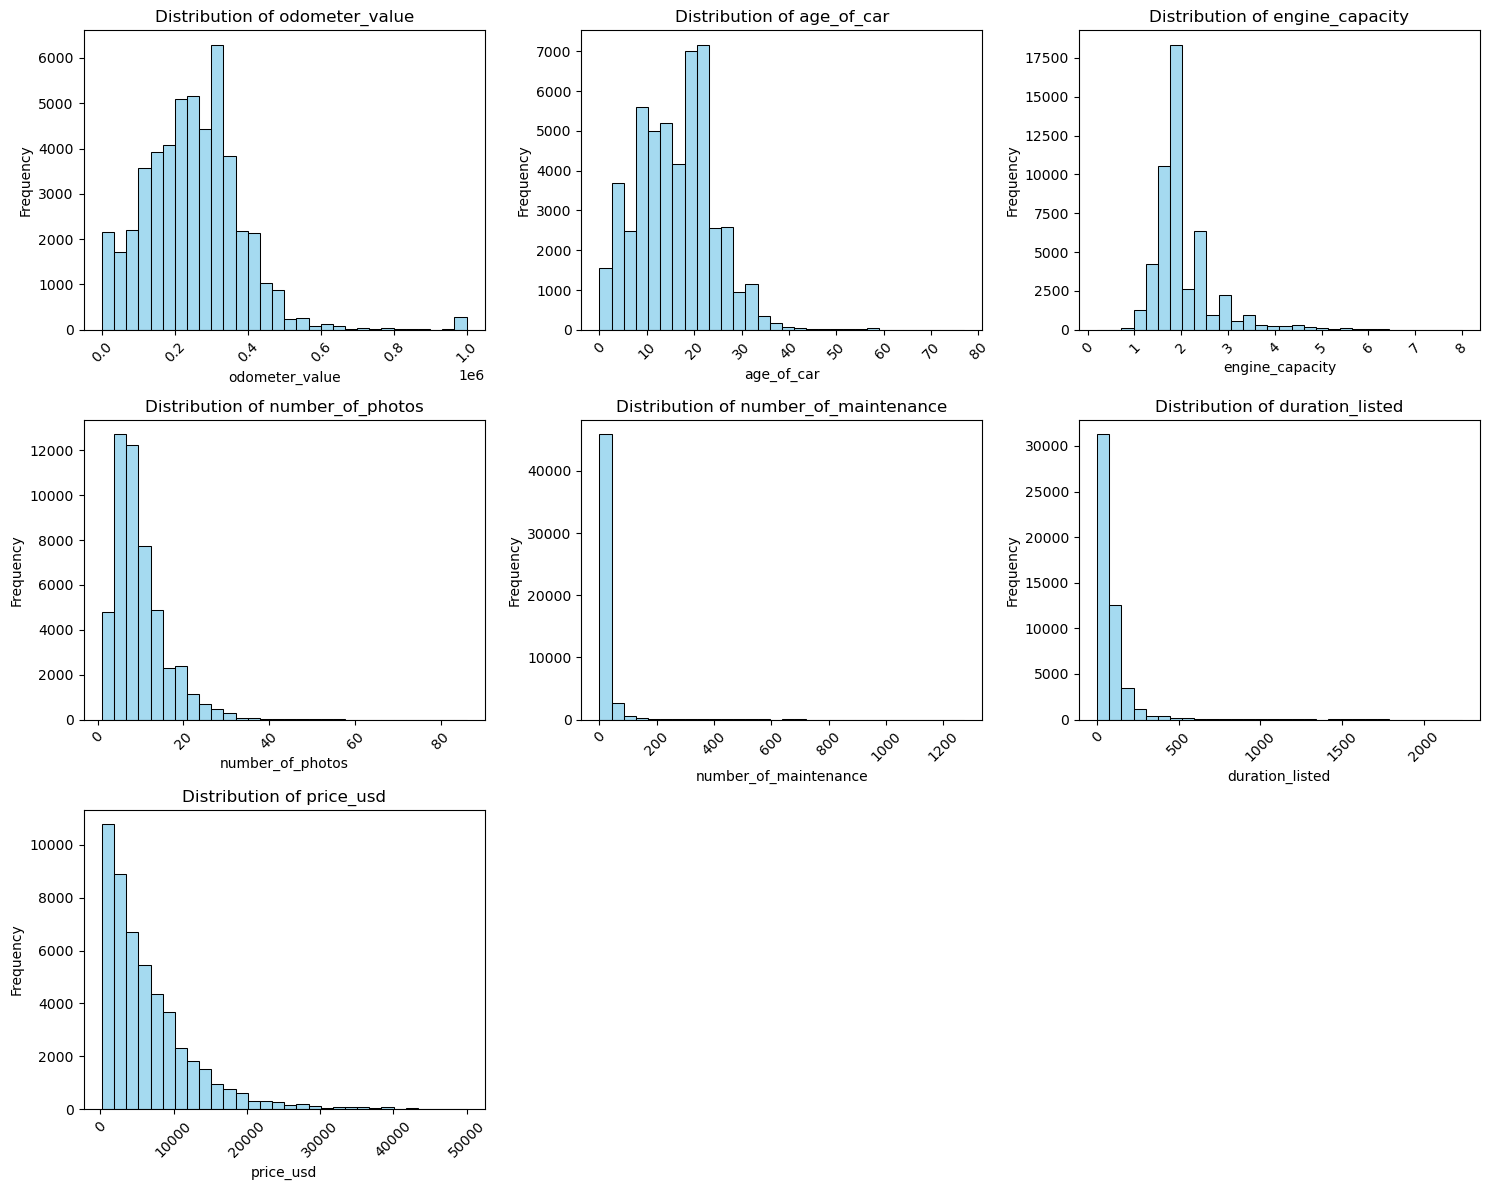

In [10]:
numerical_non_binary_features = [feature for feature in numerical_features if feature not in binary_features]

# Defining the number of rows and columns for the subplots
n_numerical_non_binary_features = len(numerical_non_binary_features)
n_cols_non_binary = 3
n_rows_non_binary = -(-n_numerical_non_binary_features // n_cols_non_binary)  # Ceiling division

# Create subplots with the adjusted number of rows
fig, axes = plt.subplots(n_rows_non_binary, n_cols_non_binary, figsize=(15, n_rows_non_binary * 4))

# If there's more than one subplot, flatten axes for easy iteration
if n_numerical_non_binary_features > 1:
    axes = axes.flatten()

# Plot distribution of each numerical non-binary feature
for i, feature in enumerate(numerical_non_binary_features):
    sns.histplot(data_train[feature], kde=False, ax=axes[i], color='skyblue', bins=30)
    axes[i].set_title(f'Distribution of {feature}', fontsize=12)
    axes[i].set_xlabel(f'{feature}')
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', labelrotation=45)

# Removing any empty subplots
for j in range(i+1, n_rows_non_binary * n_cols_non_binary):
    fig.delaxes(axes[j])

# Adjust the spacing between plots
plt.tight_layout()
plt.show()

<ul>
  <li><b>odometer_value:</b> Skewed to the right, with most cars having lower mileage, but some cars have very high mileage.</li>
  <li><b>engine_capacity:</b> Slightly right-skewed, indicating most cars have a smaller engine capacity, with fewer cars having a larger engine capacity.</li>
  <li><b>number_of_photos:</b> Right-skewed distribution, with most listings having a small number of photos, but some listings have a large number of photos.</li>
  <li><b>number_of_maintenance:</b> Highly right-skewed, indicating most cars have a small number of maintenance events, but there are some cars with a very high number of maintenance events.</li>
  <li><b>duration_listed:</b> Right-skewed, with most cars being listed for a shorter duration, but some cars have been listed for a very long time.</li>
  <li><b>price_usd:</b> Right-skewed distribution, with most cars having a lower price, but there are cars with a very high price.</li>
  <li><b>age_of_car:</b> Slightly right-skewed, indicating a majority of cars are newer, but there are also some very old cars.</li>
</ul>

#### Visualizing the binary numerical features

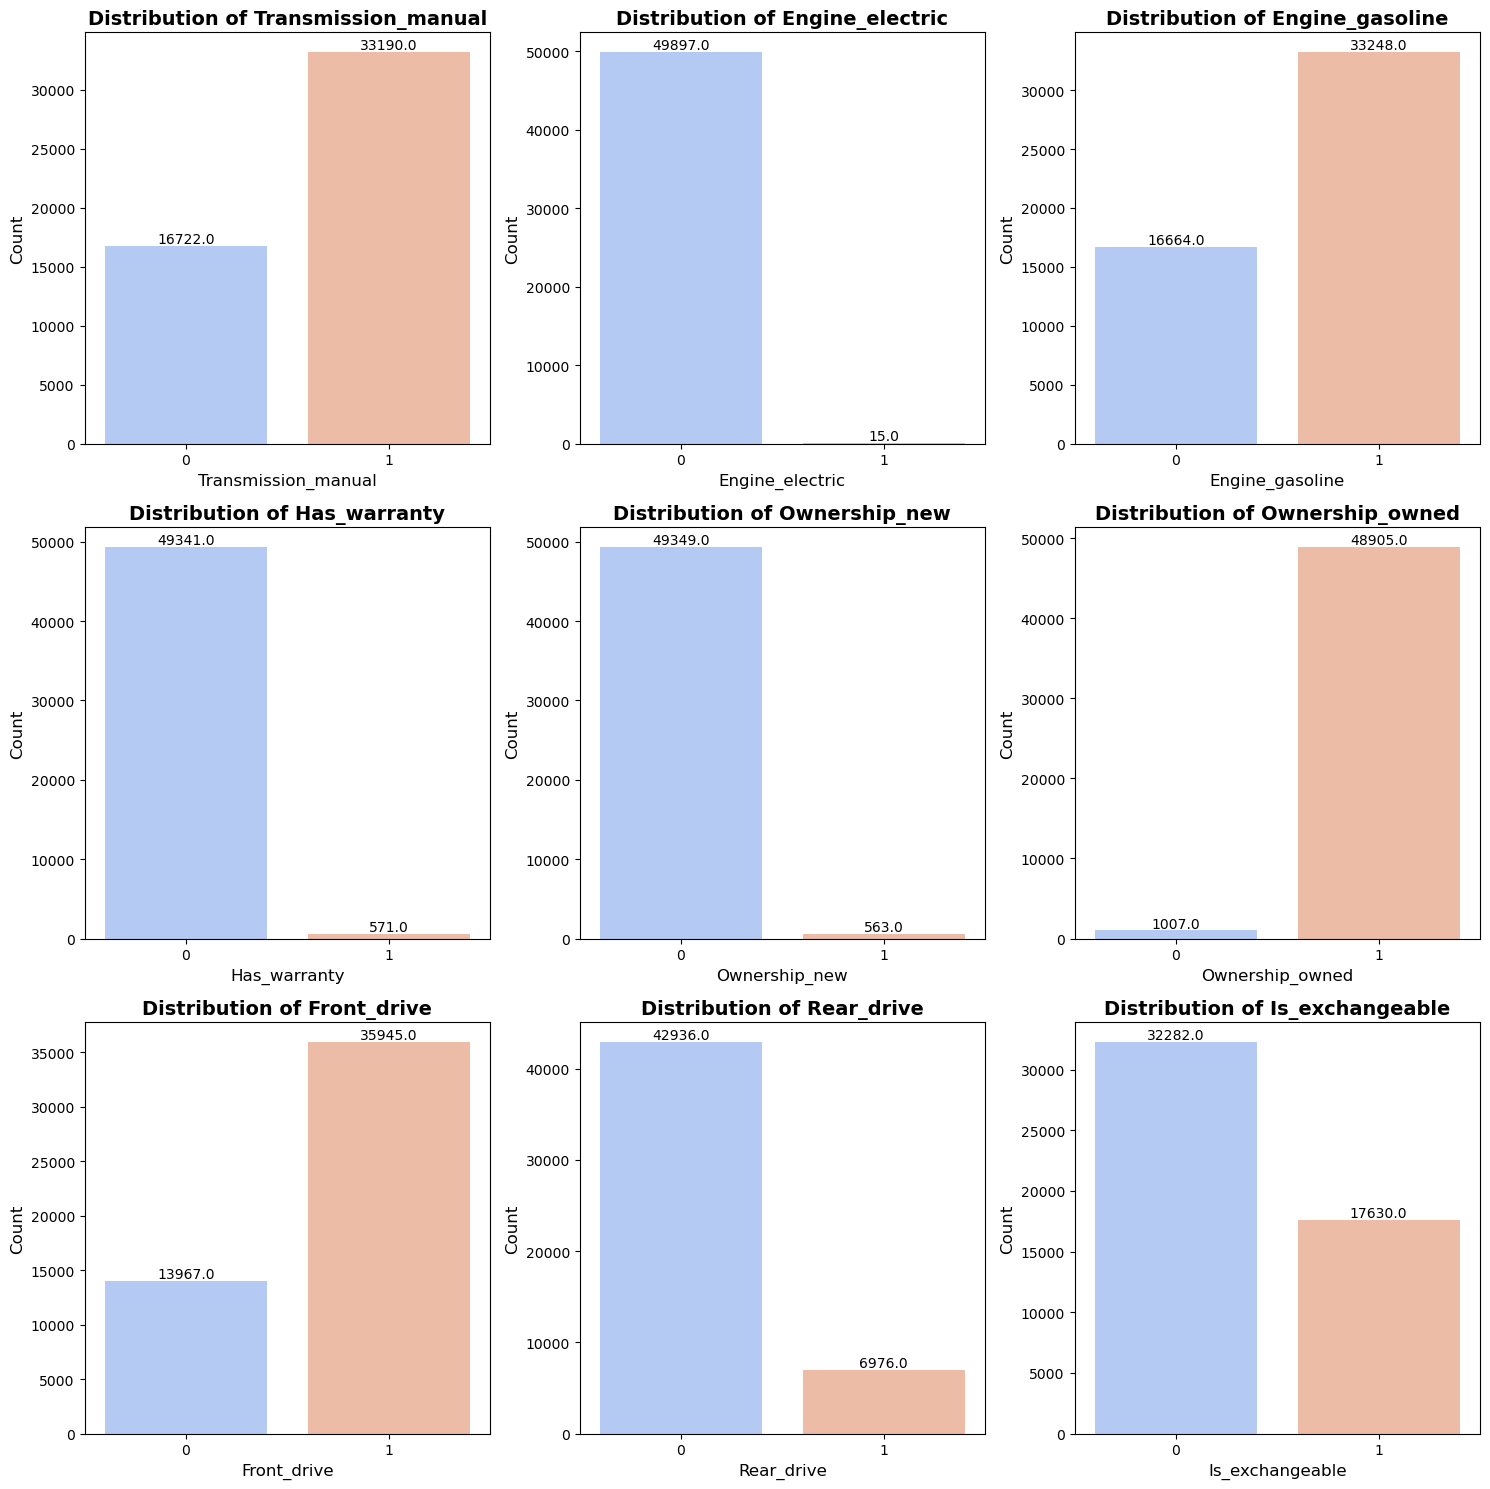

In [12]:
# Number of binary features
n_binary_features = len(binary_features)

# Calculate number of rows and columns for the subplot
n_rows_binary = -(-n_binary_features // 3)  # Ceiling division to determine rows
n_cols_binary = 3

# Create subplots
fig, axes = plt.subplots(n_rows_binary, n_cols_binary, figsize=(15, n_rows_binary * 5))
axes = axes.flatten()

# Plot distribution of each binary feature
for i, feature in enumerate(binary_features):
    sns.countplot(data=data_train, x=feature, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'Distribution of {feature.capitalize()}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(f'{feature.capitalize()}', fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(axis='x', labelrotation=0)
    
    # Annotate bar plots
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                         textcoords='offset points')

# Adjust the spacing between plots and remove empty subplots
plt.tight_layout()
for j in range(n_binary_features, n_rows_binary * n_cols_binary):
    fig.delaxes(axes[j])
plt.show()

<ul>
  <li><b>Transmission Manual:</b> A majority of cars have a manual transmission.</li>
  <li><b>Engine Electric:</b> Very few cars have an electric engine.</li>
  <li><b>Engine Gasoline:</b> A significant number of cars have a gasoline engine.</li>
  <li><b>Ownership New:</b> Very few cars are listed as new.</li>
  <li><b>Ownership Owned:</b> Almost all cars are listed as owned.</li>
  <li><b>Has Warranty:</b> Very few cars come with a warranty.</li>
  <li><b>Is Exchangeable:</b> A substantial number of cars are exchangeable.</li>
  <li><b>Front Drive:</b> A majority of cars have front-wheel drive.</li>
  <li><b>Rear Drive:</b> A smaller number of cars have rear-wheel drive.</li>
</ul>

#### Visualizing the categorical features distribution

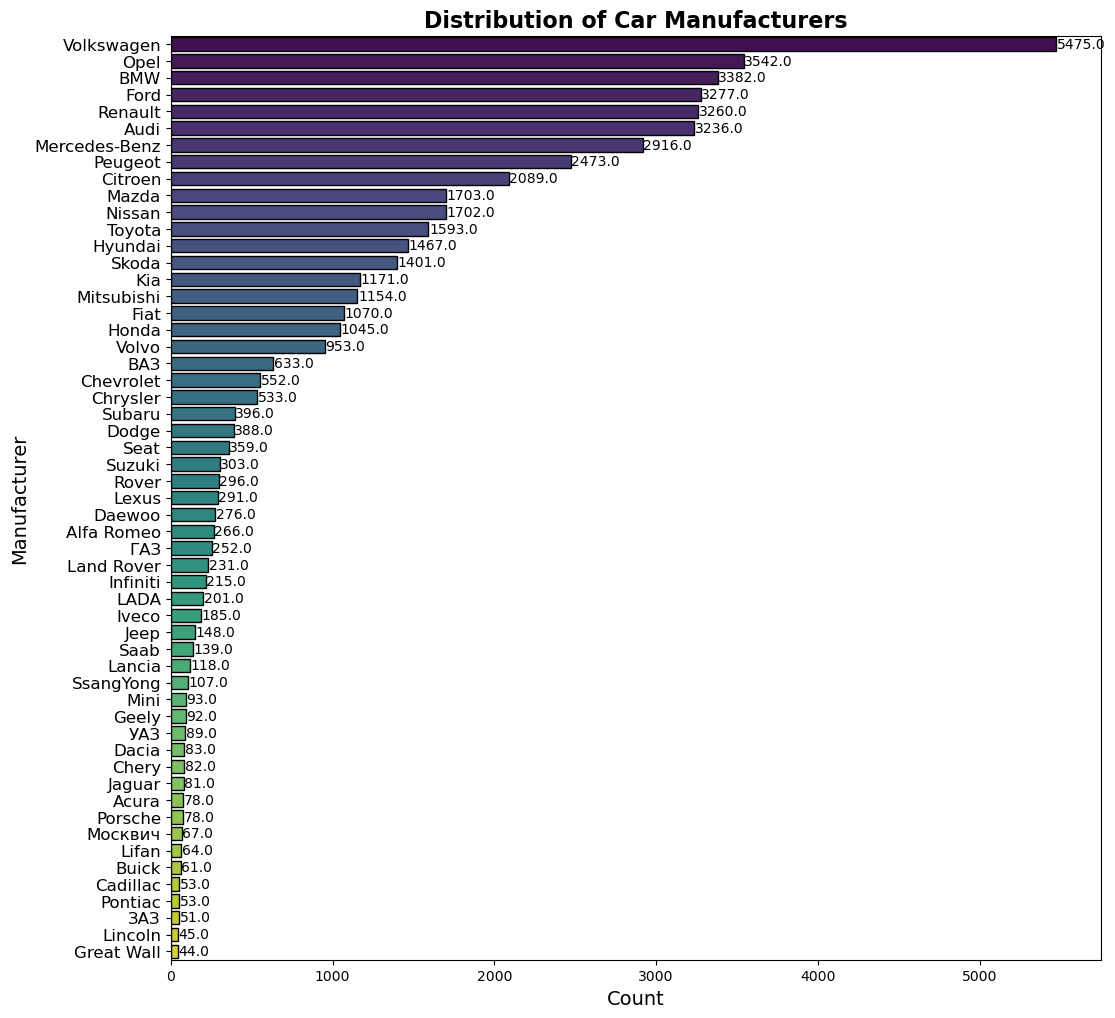

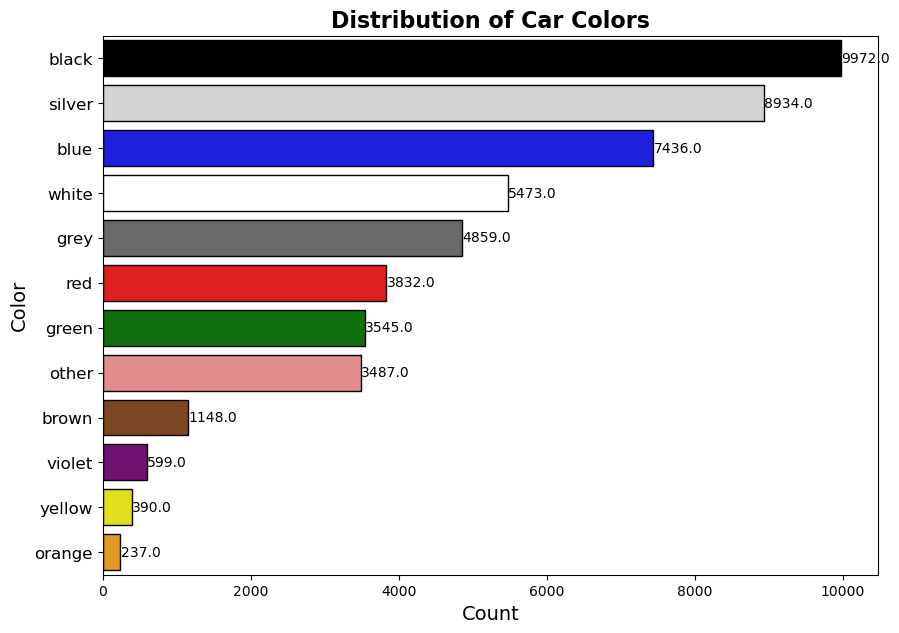

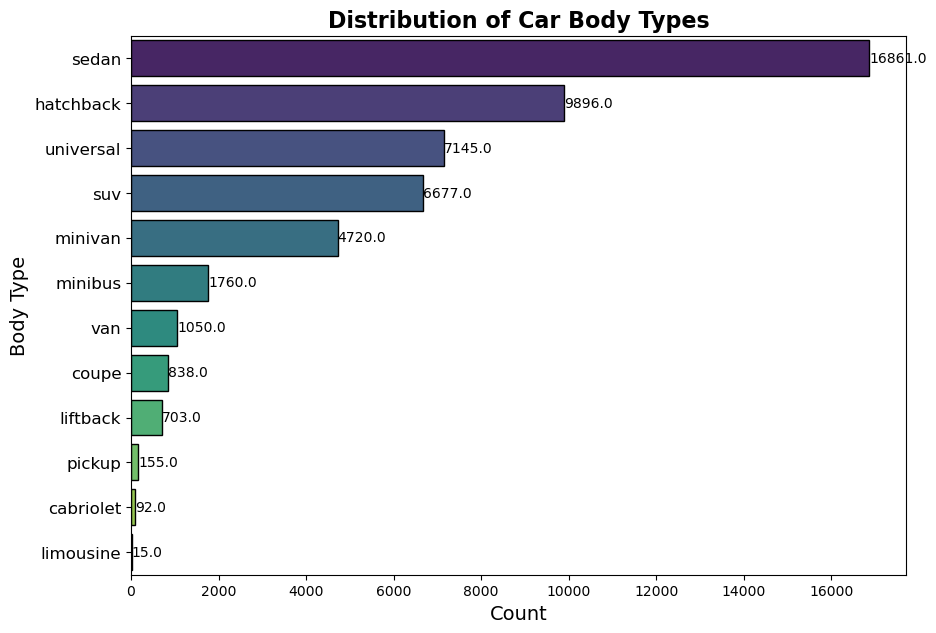

In [14]:
# Color mapping to match car colors
color_mapping = {
    'black': 'black', 
    'white': 'white', 
    'silver': 'lightgrey', 
    'blue': 'blue', 
    'grey': 'dimgrey', 
    'red': 'red', 
    'green': 'green', 
    'other': 'lightcoral', 
    'brown': 'saddlebrown', 
    'violet': 'purple', 
    'orange': 'orange', 
    'yellow': 'yellow'
}

# Manufacturer Name Distribution
fig, ax = plt.subplots(figsize=(12, 12))
order_manufacturer = data_train['manufacturer_name'].value_counts().index
sns.countplot(data=data_train, y='manufacturer_name', order=order_manufacturer, palette='viridis', ax=ax, edgecolor='black')
ax.set_title('Distribution of Car Manufacturers', fontsize=16, fontweight='bold')
ax.set_ylabel('Manufacturer', fontsize=14)
ax.set_xlabel('Count', fontsize=14)
ax.tick_params(axis='y', labelsize=12)
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 3, p.get_y() + p.get_height() / 2, f'{width}', va='center', fontsize=10)

# Car Color Distribution
fig, ax = plt.subplots(figsize=(10, 7))
order_color = data_train['color'].value_counts().index
sns.countplot(data=data_train, y='color', order=order_color, palette=color_mapping, ax=ax, edgecolor='black')
ax.set_title('Distribution of Car Colors', fontsize=16, fontweight='bold')
ax.set_ylabel('Color', fontsize=14)
ax.set_xlabel('Count', fontsize=14)
ax.tick_params(axis='y', labelsize=12)
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 3, p.get_y() + p.get_height() / 2, f'{width}', va='center', fontsize=10)

# Car Body Type Distribution
fig, ax = plt.subplots(figsize=(10, 7))
order_body_type = data_train['body_type'].value_counts().index
sns.countplot(data=data_train, y='body_type', order=order_body_type, palette='viridis', ax=ax, edgecolor='black')
ax.set_title('Distribution of Car Body Types', fontsize=16, fontweight='bold')
ax.set_ylabel('Body Type', fontsize=14)
ax.set_xlabel('Count', fontsize=14)
ax.tick_params(axis='y', labelsize=12)
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 3, p.get_y() + p.get_height() / 2, f'{width}', va='center', fontsize=10)
    
plt.show()

<h3>Observations of Categorical Features</h3>

<h3>Car Manufacturers</h3>

<ul>
  <li>The dataset includes a wide variety of car manufacturers.</li>
  <li>Some manufacturers, like Volkswagen and BMW, are more prevalent, while others are less common.</li>
  <li>This variety adds diversity to the dataset but could also introduce biases towards certain manufacturers if not balanced properly.</li>
</ul>

<h3>Car Colors</h3>

<ul>
  <li>The most common car colors are black, white, and silver.</li>
  <li>These are typical car colors, reflecting common consumer preferences.</li>
  <li>The variety in car colors is well-represented, although some colors like orange and violet are less common.</li>
</ul>

<h3>Car Body Types</h3>

<ul>
  <li>Sedan and SUV are the most common body types, which is consistent with global car sales trends.</li>
  <li>There is a good representation of different body types, although some like bus and pickup are less common.</li>
</ul>

## Dealing with Outliers

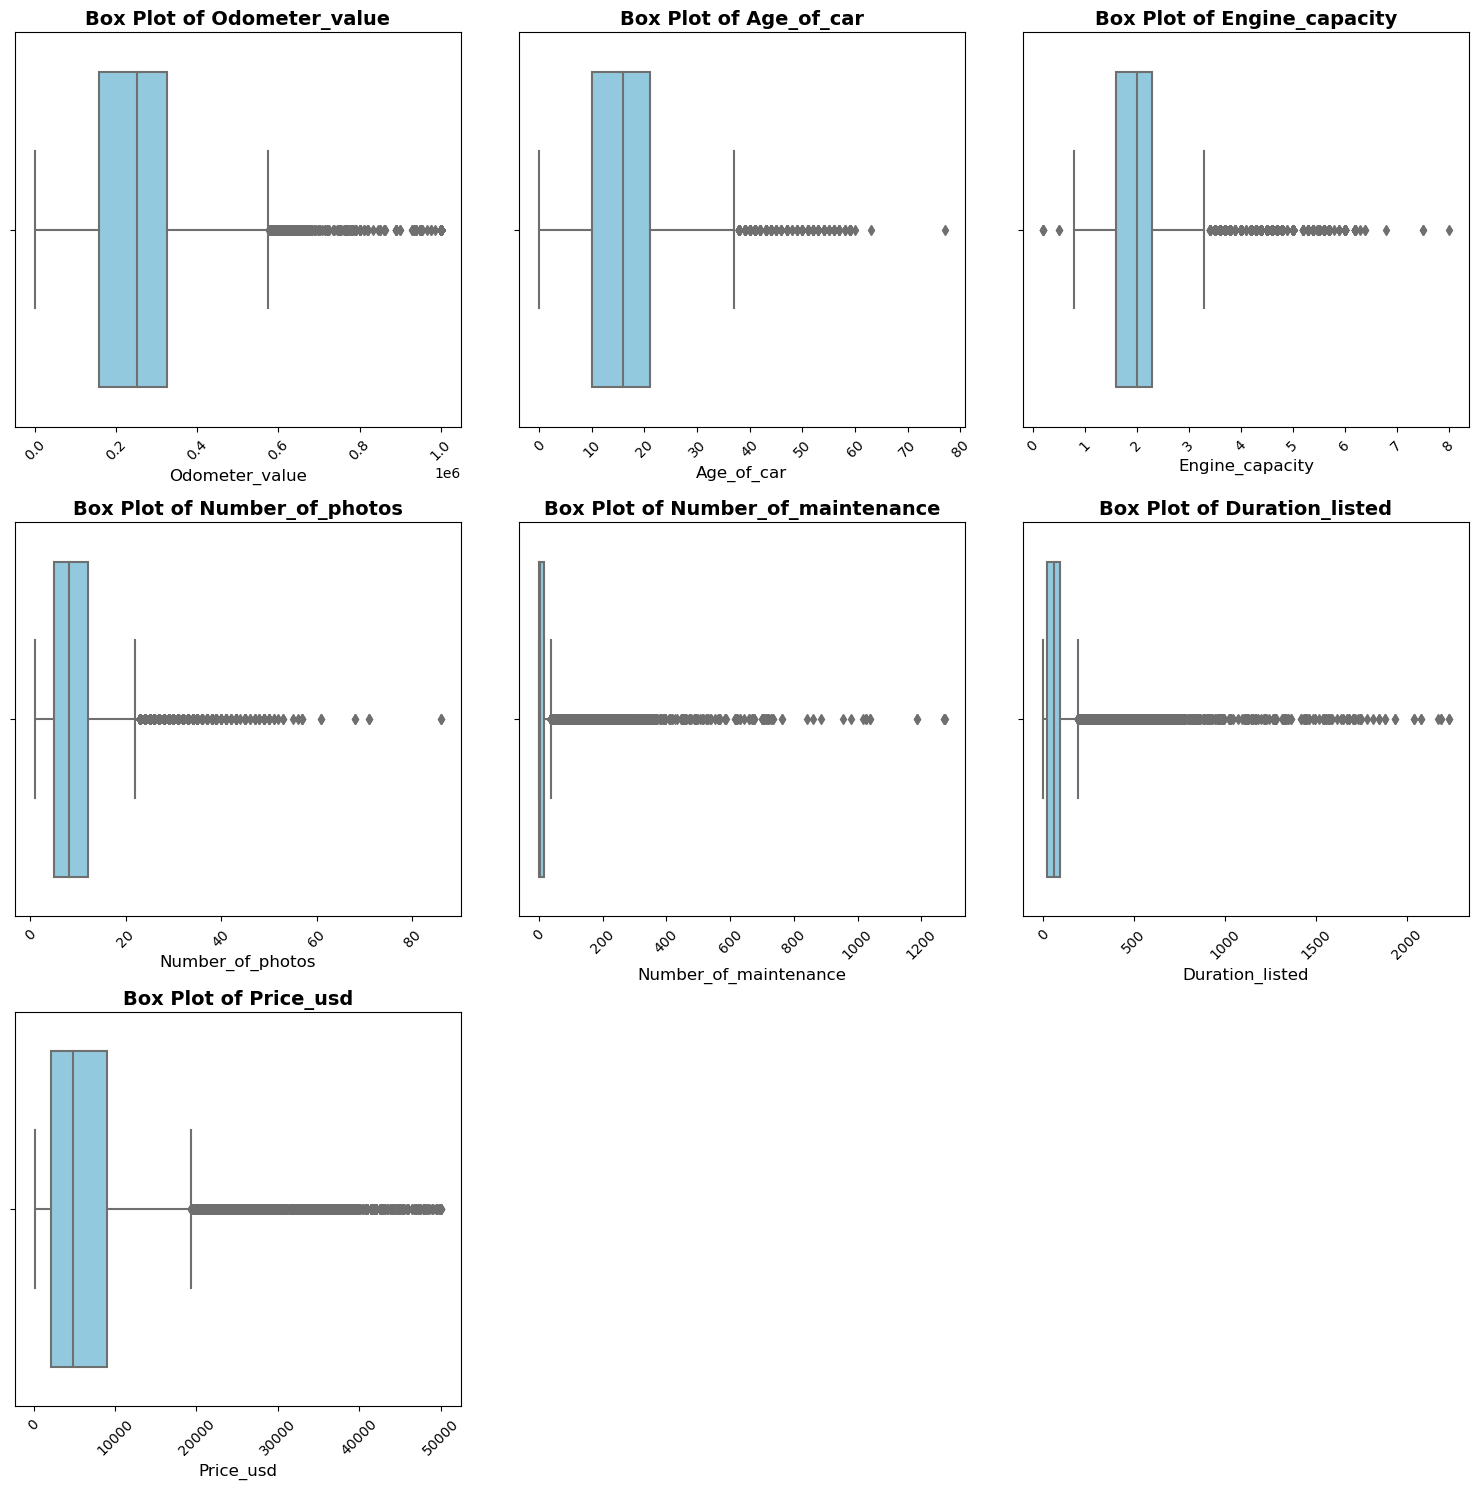

In [16]:
# Number of rows and columns for the subplot
n_rows_outlier = n_rows_non_binary
n_cols_outlier = n_cols_non_binary

# Create subplots
fig, axes = plt.subplots(n_rows_outlier, n_cols_outlier, figsize=(15, n_rows_outlier * 5))
axes = axes.flatten()

# Plot box plots for each numerical non-binary feature
for i, feature in enumerate(numerical_non_binary_features):
    sns.boxplot(x=data_train[feature], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot of {feature.capitalize()}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(f'{feature.capitalize()}', fontsize=12)
    axes[i].tick_params(axis='x', labelrotation=45)

# Adjust the spacing between plots
plt.tight_layout()

# Remove any empty subplots
for j in range(i+1, n_rows_outlier * n_cols_outlier):
    fig.delaxes(axes[j])

plt.show()

<h5>Odometer Value</h5>

<p>There are a significant number of outliers with very high mileage.</p>

<h5>Engine Capacity</h5>

<p>Some cars have unusually high engine capacity.</p>

<h5>Number of Photos</h5>

<p>Most listings have a moderate number of photos, but there are outliers with a very high number.</p>

<h5>Number of Maintenance</h5>

<p>There are cars with an unusually high number of maintenance events.</p>

<h5>Duration Listed</h5>

<p>Some cars have been listed for an exceptionally long time.</p>

<h5>Price USD</h5>

<p>There are cars with unusually high prices, which could be luxury or unique cars.</p>

<h5>Age of Car</h5>

<p>Most cars are relatively new, but there are some very old cars in the dataset.</p>

<h2>Strategies to Mitigate the Impact of Outliers</h2>
<p>There are a variety of strategies to mitigate the impact of outliers on a dataset, depending on the nature of the data and the goals of your analysis or modeling. Some common approaches include:</p>
<ul>
<li><strong>Transformation:</li>
<ul>
<li><strong>Log Transformation:</strong> Applying a logarithmic transformation can reduce the impact of outliers, especially for right-skewed data.</li>
<li><strong>Square Root or Cube Root Transformation:</strong> These transformations can also reduce the impact of outliers and are less strong than a log transformation.</li>
<li><strong>Box-Cox or Yeo-Johnson Transformation:</strong> These are generalizations of logarithmic transformations and can be used to stabilize variance and make the data more normal distribution-like.</li>
</ul>
<li><strong>Imputation:</li>
<ul>
<li><strong>Replacing Outliers:</strong> Replace outliers with summary statistics such as the mean, median, or a domain-specific value.</li>
<li><strong>Winsorizing:</strong> Cap the outliers to a certain threshold, for example, the 1st and 99th percentiles.</li>
</ul>
<li><strong>Robust Scaling:</li>
<ul>
<li><strong>RobustScaler:</strong> Use scalers that are robust to outliers, such as RobustScaler in scikit-learn, which scales features using the median and the interquartile range.</li>
</ul>
<li><strong>Use Robust Models:</li>
<ul>
<li><strong>Robust Models:</strong> Some machine learning models are more robust to outliers. For example, tree-based models like Random Forests and Gradient Boosting Machines can handle outliers well.</li>
</ul>
<li><strong>Binning:</li>
<ul>
<li><strong>Binning:</strong> Convert numerical features into categorical bins, which can reduce the impact of outliers.</li>
</ul>


<body>

<h2>Reasons for Outliers in the Dataset</h2>

<p>We need to keep in mind that there are several reasons for the presence of outliers in the dataset obtained from online car listings:</p>

<ol>
    <li>
        <strong>Diverse Range of Cars:</strong> Online listings include a wide variety of cars, ranging from old and inexpensive models to new, luxury, and potentially very expensive models. This naturally leads to a wide distribution in features like price, age, and odometer value, resulting in outliers.
    </li>
    <li>
        <strong>Condition and Rarity:</strong> The condition of a car (e.g., new, used, or vintage) and its rarity (e.g., common models vs. rare collector's items) can significantly impact its price and other features, leading to outliers. For example, a vintage car in excellent condition might be listed at a much higher price than the average car, creating an outlier in the price distribution.
    </li>
    <li>
        <strong>Human Error or Misrepresentation:</strong> Sellers might accidentally input incorrect information, leading to outliers. For example, an extra zero in the price or odometer value. In some cases, sellers might intentionally misrepresent the car's features or condition, resulting in outliers.
    </li>
    <li>
        <strong>Diverse Seller Motivations:</strong> Sellers have different motivations and circumstances, which can lead to a wide range of listing prices and conditions. Some might be looking to sell quickly and list at a lower price, while others might be testing the market with a high price.
    </li>
    <li>
        <strong>Inconsistent Data Entry:</strong> The data might be entered in various ways, leading to inconsistencies and potential outliers. For example, the odometer value for one car might be in miles, while for another, it might be in kilometers.
    </li>
</ol>

</body>

**However,** Let's apply transformations to normalize the data

#### Applying Transformations to Numerical Features

In [19]:
# Creating a copy of the dataset for transformations
data_transformed = data_train.copy()

# Applying log transformation (adding 1 to avoid log(0))
log_transform_features = ['odometer_value', 'number_of_photos', 'number_of_maintenance', 'duration_listed']
for feature in log_transform_features:
    data_transformed[feature] = np.log1p(data_transformed[feature])

# Applying square root transformation
sqrt_transform_features = ['age_of_car']
for feature in sqrt_transform_features:
    data_transformed[feature] = np.sqrt(data_transformed[feature])

# Applying Box-Cox or Yeo-Johnson transformation
boxcox_transform_features = ['engine_capacity']
pt = PowerTransformer(method='yeo-johnson', standardize=False)  # Using Yeo-Johnson for handling zero values
data_transformed[boxcox_transform_features] = pt.fit_transform(data_transformed[boxcox_transform_features])

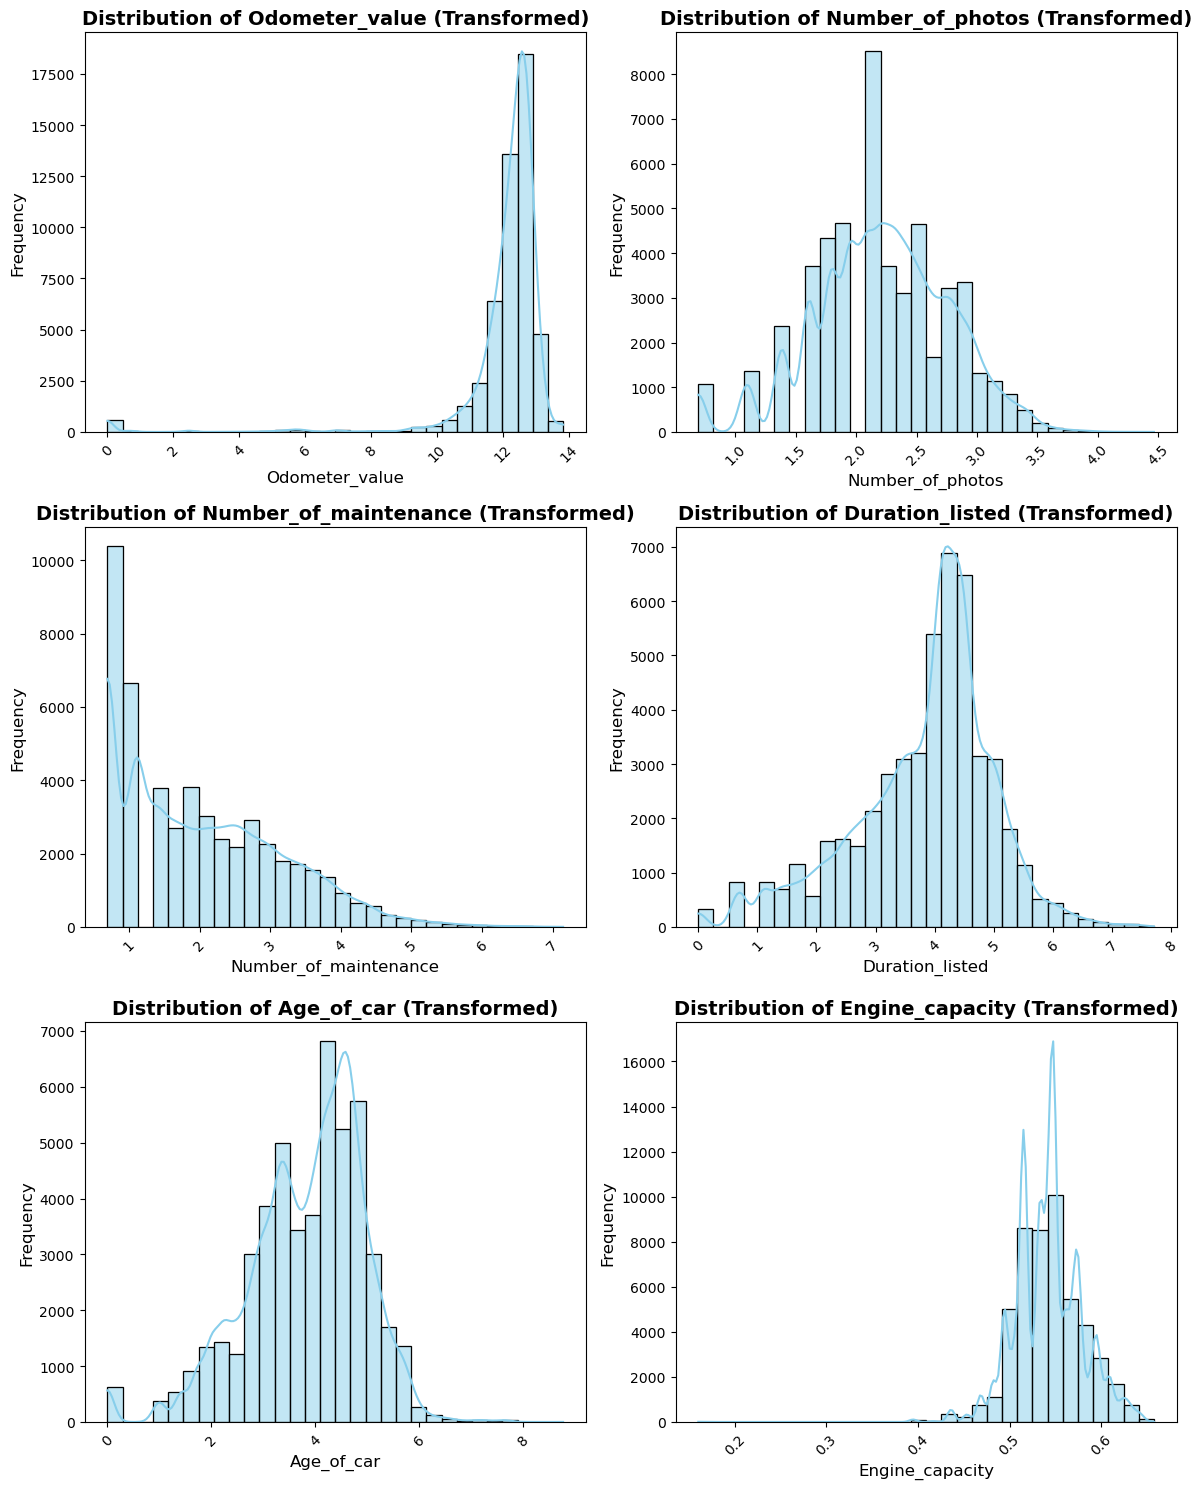

In [20]:
# Visualizing the transformed features
n_rows_transformed = 3
n_cols_transformed = 2
fig, axes = plt.subplots(n_rows_transformed, n_cols_transformed, figsize=(12, 15))
axes = axes.flatten()

# Plot distribution of each transformed feature
for i, feature in enumerate(log_transform_features + sqrt_transform_features + boxcox_transform_features):
    sns.histplot(data_transformed[feature], kde=True, ax=axes[i], color='skyblue', bins=30)
    axes[i].set_title(f'Distribution of {feature.capitalize()} (Transformed)', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(f'{feature.capitalize()}', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].tick_params(axis='x', labelrotation=45)

# Adjust the spacing between plots
plt.tight_layout()
plt.show()

**Observations**
- **Odometer Value:** The log transformation has reduced the skewness, resulting in a more symmetric distribution.
- **Number of Photos:** The distribution is now more centered and less skewed, making it more normal-like.
- **Number of Maintenance:** The transformation has successfully dealt with the skewness, creating a more balanced distribution.
- **Duration Listed:** The log transformation has mitigated the impact of extreme values, resulting in a more uniform distribution.
- **Age of Car:** The square root transformation has reduced the skewness, although the distribution is still somewhat right-skewed.
- **Engine Capacity:** The Yeo-Johnson transformation has normalized the distribution, making it more symmetric.

In [21]:
data_transformed.head()

,manufacturer_name,transmission_manual,color,odometer_value,age_of_car,engine_electric,engine_gasoline,engine_capacity,body_type,has_warranty,ownership_new,ownership_owned,front_drive,rear_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,Volkswagen,0,black,11.775297,1.732051,0,0,0.515368,universal,0,0,1,1,0,1,2.890372,3.663562,4.219508,13150.0
1,Renault,1,brown,11.911708,2.645751,0,1,0.515368,sedan,0,0,1,1,0,0,2.302585,1.386294,4.615121,7500.0
2,Kia,0,brown,11.608245,2.236068,0,1,0.515368,hatchback,0,0,1,1,0,0,1.791759,2.397895,4.521789,12200.0
3,Opel,0,other,12.449415,3.464102,0,1,0.532791,hatchback,0,0,1,1,0,0,2.397895,1.609438,4.521789,4950.0
4,Mazda,1,blue,13.384729,4.472136,0,1,0.547402,sedan,0,0,1,1,0,1,1.791759,2.079442,4.143135,3000.0


#### Applying transformations in the testing dataset

In [22]:
# Creating a copy of the test dataset for transformations
data_transformed_test = data_test.copy()

# Applying log transformation (adding 1 to avoid log(0))
for feature in log_transform_features:
    if feature in data_transformed_test.columns:
        data_transformed_test[feature] = np.log1p(data_transformed_test[feature])

# Applying square root transformation
for feature in sqrt_transform_features:
    if feature in data_transformed_test.columns:
        data_transformed_test[feature] = np.sqrt(data_transformed_test[feature])

# Applying Box-Cox or Yeo-Johnson transformation
if boxcox_transform_features[0] in data_transformed_test.columns:
    data_transformed_test[boxcox_transform_features] = pt.transform(data_transformed_test[boxcox_transform_features])

data_transformed_test.head()

,manufacturer_name,transmission_manual,color,odometer_value,age_of_car,engine_electric,engine_gasoline,engine_capacity,body_type,has_warranty,ownership_new,ownership_owned,front_drive,rear_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,BMW,0,white,11.652696,2.645751,0,1,0.626847,sedan,0,0,1,0,0,1,3.496508,4.653960,4.990433,20450.0
1,Mercedes-Benz,1,other,13.122365,4.472136,0,0,0.559801,sedan,0,0,1,0,1,0,2.079442,2.302585,4.997212,2600.0
2,Fiat,1,silver,12.254868,4.123106,0,1,0.468445,hatchback,0,0,1,1,0,1,2.833213,2.079442,3.332205,2900.0
3,Mitsubishi,0,violet,12.591338,4.358899,0,0,0.600925,suv,0,0,1,0,0,1,2.397895,1.098612,3.891820,7500.0
4,Opel,0,blue,12.404928,4.582576,0,1,0.515368,sedan,0,0,1,1,0,0,2.302585,2.397895,4.762174,2200.0


### Analyzing Price Column

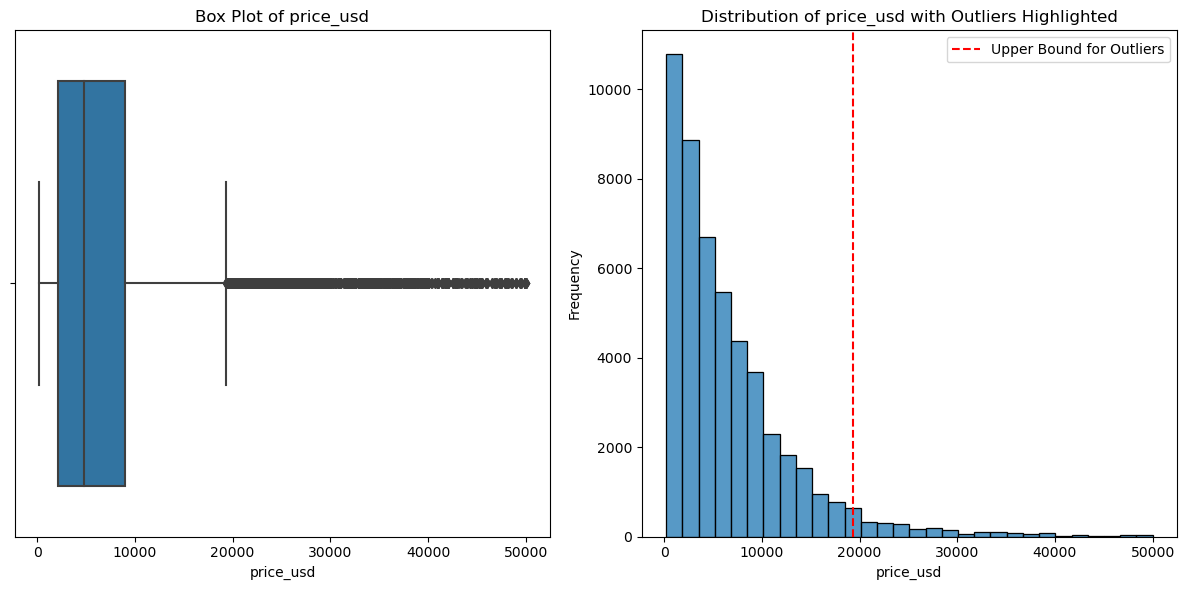

count     2308.000000
mean     27365.119441
std       7320.004955
min      19350.000000
25%      21500.000000
50%      25000.000000
75%      31721.742500
max      50000.000000
Name: price_usd, dtype: float64

In [26]:
# Identifying Outliers using IQR method for 'price_usd'
Q1 = data_transformed['price_usd'].quantile(0.25)
Q3 = data_transformed['price_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset for high-priced outliers
high_priced_outliers = data_transformed[data_transformed['price_usd'] > upper_bound]

# Visualizing Outliers
plt.figure(figsize=(12, 6))

# Box plot for 'price_usd'
plt.subplot(1, 2, 1)
sns.boxplot(x=data_transformed['price_usd'])
plt.title('Box Plot of price_usd')

# Histogram for 'price_usd' with outlier region highlighted
plt.subplot(1, 2, 2)
sns.histplot(data_transformed['price_usd'], kde=False, bins=30)
plt.axvline(x=upper_bound, color='red', linestyle='--', label='Upper Bound for Outliers')
plt.title('Distribution of price_usd with Outliers Highlighted')
plt.xlabel('price_usd')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Display basic statistics and the first few rows of high-priced outliers
summary_high_priced = high_priced_outliers['price_usd'].describe()

summary_high_priced

In [27]:
high_priced_outliers.head()

,manufacturer_name,transmission_manual,color,odometer_value,age_of_car,engine_electric,engine_gasoline,engine_capacity,body_type,has_warranty,ownership_new,ownership_owned,front_drive,rear_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
15,BMW,0,black,12.041281,2.44949,0,0,0.547402,universal,0,0,1,0,0,0,3.332205,3.135494,3.688879,20800.0
35,Lexus,0,other,12.206078,3.00000,0,1,0.629871,sedan,0,0,1,0,0,0,1.791759,1.609438,4.127134,19500.0
91,BMW,0,white,11.711785,2.44949,0,0,0.594695,suv,0,0,1,0,0,0,0.693147,0.693147,4.043051,32000.0
102,Toyota,0,black,11.628938,2.00000,0,1,0.575191,sedan,0,0,1,1,0,1,2.564949,1.098612,3.806662,19700.0
160,Volkswagen,1,silver,12.013707,2.00000,0,0,0.547402,minibus,0,0,1,1,0,1,2.995732,1.609438,2.890372,26950.0


In [28]:
high_priced_outliers.describe()

,transmission_manual,odometer_value,age_of_car,engine_electric,engine_gasoline,engine_capacity,has_warranty,ownership_new,ownership_owned,front_drive,rear_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
count,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000
mean,0.125217,9.922949,1.994088,0.001733,0.599653,0.571049,0.120017,0.133449,0.865685,0.241334,0.143847,0.413778,2.623308,2.375228,3.843376,27365.119441
std,0.331036,3.999771,1.029368,0.041603,0.490075,0.037098,0.325052,0.340133,0.341065,0.427985,0.351011,0.492616,0.582374,1.255360,1.315712,7320.004955
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.468445,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,0.000000,19350.000000
25%,0.000000,10.703559,1.414214,0.000000,0.000000,0.547402,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.302585,1.386294,3.218876,21500.000000
50%,0.000000,11.510933,2.236068,0.000000,1.000000,0.565314,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.772589,2.397895,4.060443,25000.000000
75%,0.000000,11.957618,2.645751,0.000000,1.000000,0.594695,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.995732,3.258097,4.672829,31721.742500
max,1.000000,13.190024,8.774964,1.000000,1.000000,0.648414,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.060443,6.933423,7.691657,50000.000000


The high prices of the cars in this subset can be justified by their relatively new age, potentially larger engine capacities, and better documentation and maintenance, as indicated by the number of photos and maintenance records. Additionally, the wide range of prices and significant variation within this subset suggest that there are various factors at play contributing to their high prices.​​

#### Let's create a seperate dataframe called df_no_outliers, where we apply log transformation to the price and remove all outliers. Later, we will compare the performance of the machine learning models in both the dataframes

In [29]:
# 1. Remove the high-priced outliers from the dataset
df_no_outliers = data_transformed[data_transformed['price_usd'] <= upper_bound]

# 2. Apply log transformation to the 'price_usd' column
df_no_outliers['price_usd'] = np.log(df_no_outliers['price_usd'])

# Display the first few rows of the new dataset
df_no_outliers.head()

,manufacturer_name,transmission_manual,color,odometer_value,age_of_car,engine_electric,engine_gasoline,engine_capacity,body_type,has_warranty,ownership_new,ownership_owned,front_drive,rear_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,Volkswagen,0,black,11.775297,1.732051,0,0,0.515368,universal,0,0,1,1,0,1,2.890372,3.663562,4.219508,9.484177
1,Renault,1,brown,11.911708,2.645751,0,1,0.515368,sedan,0,0,1,1,0,0,2.302585,1.386294,4.615121,8.922658
2,Kia,0,brown,11.608245,2.236068,0,1,0.515368,hatchback,0,0,1,1,0,0,1.791759,2.397895,4.521789,9.409191
3,Opel,0,other,12.449415,3.464102,0,1,0.532791,hatchback,0,0,1,1,0,0,2.397895,1.609438,4.521789,8.507143
4,Mazda,1,blue,13.384729,4.472136,0,1,0.547402,sedan,0,0,1,1,0,1,1.791759,2.079442,4.143135,8.006368


In [30]:
df_no_outliers.shape

(47604, 19)

## Correlation Analysis

### Correlation for numerical features using Sperman rank correlation

In [34]:
# Excluding nominal categorical features for correlation analysis
features_to_exclude = ['manufacturer_name', 'model_name', 'color', 'body_type']
features_present = [feature for feature in features_to_exclude if feature in data_transformed.columns]
numerical_and_ordinal_features = data_transformed.drop(columns=features_present)

# Calculating Spearman rank correlation coefficients for all features with respect to price_usd
correlation_spearman = numerical_and_ordinal_features.corr(method='spearman')['price_usd'].sort_values(ascending=False)

# Dropping the correlation of price_usd with itself
correlation_spearman = correlation_spearman.drop(labels=['price_usd'])

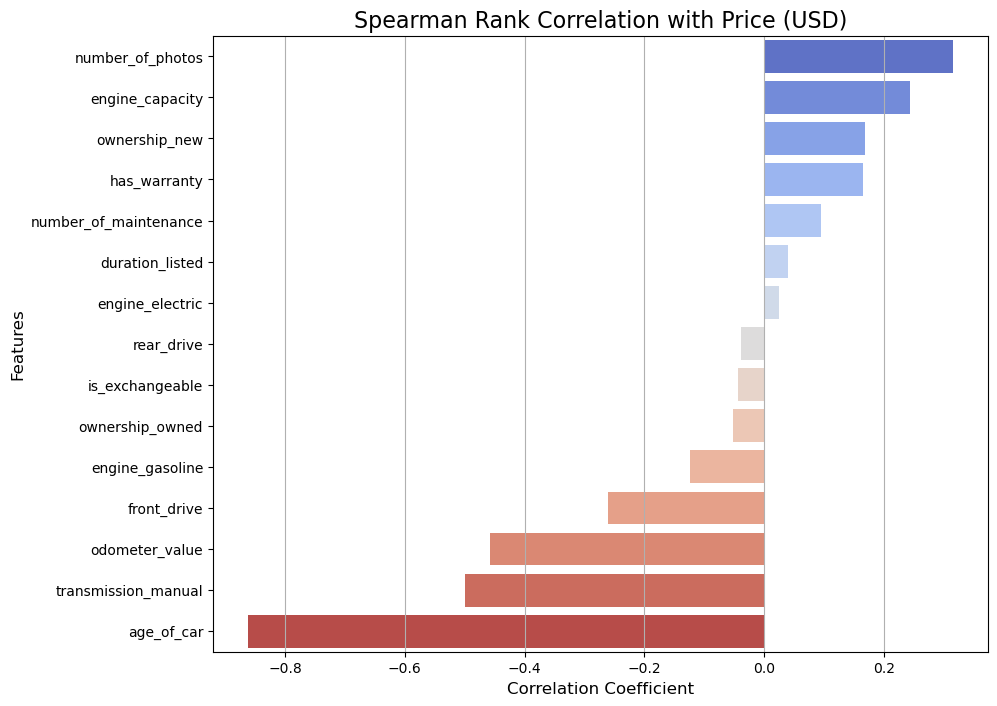

In [33]:
# Creating a bar plot for the correlation coefficients
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_spearman.values, y=correlation_spearman.index, palette='coolwarm')
plt.title('Spearman Rank Correlation with Price (USD)', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x')
plt.show()


<table border="1" cellpadding="5">
<caption>Car Price Correlation Table</caption>
<thead>
<tr>
<th>Feature</th>
<th>Correlation with Price</th>
</tr>
</thead>
<tbody>
<tr>
<td>Age of Car</td>
<td>Strong negative (-0.86)</td>
</tr>
<tr>
<td>Transmission (Manual)</td>
<td>Moderate negative (-0.50)</td>
</tr>
<tr>
<td>Odometer Value</td>
<td>Moderate negative (-0.46)</td>
</tr>
<tr>
<td>Front Drive</td>
<td>Moderate negative (-0.26)</td>
</tr>
<tr>
<td>All Drive & Four-Wheel Drive</td>
<td>Moderate positive (0.38)</td>
</tr>
<tr>
<td>Number of Photos</td>
<td>Moderate positive (0.32)</td>
</tr>
<tr>
<td>Engine Capacity</td>
<td>Mild positive (0.25)</td>
</tr>
<tr>
<td>Other Features</td>
<td>Low or no significant correlation</td>
</tr>
</tbody>
</table>

### Correlation for categorical features

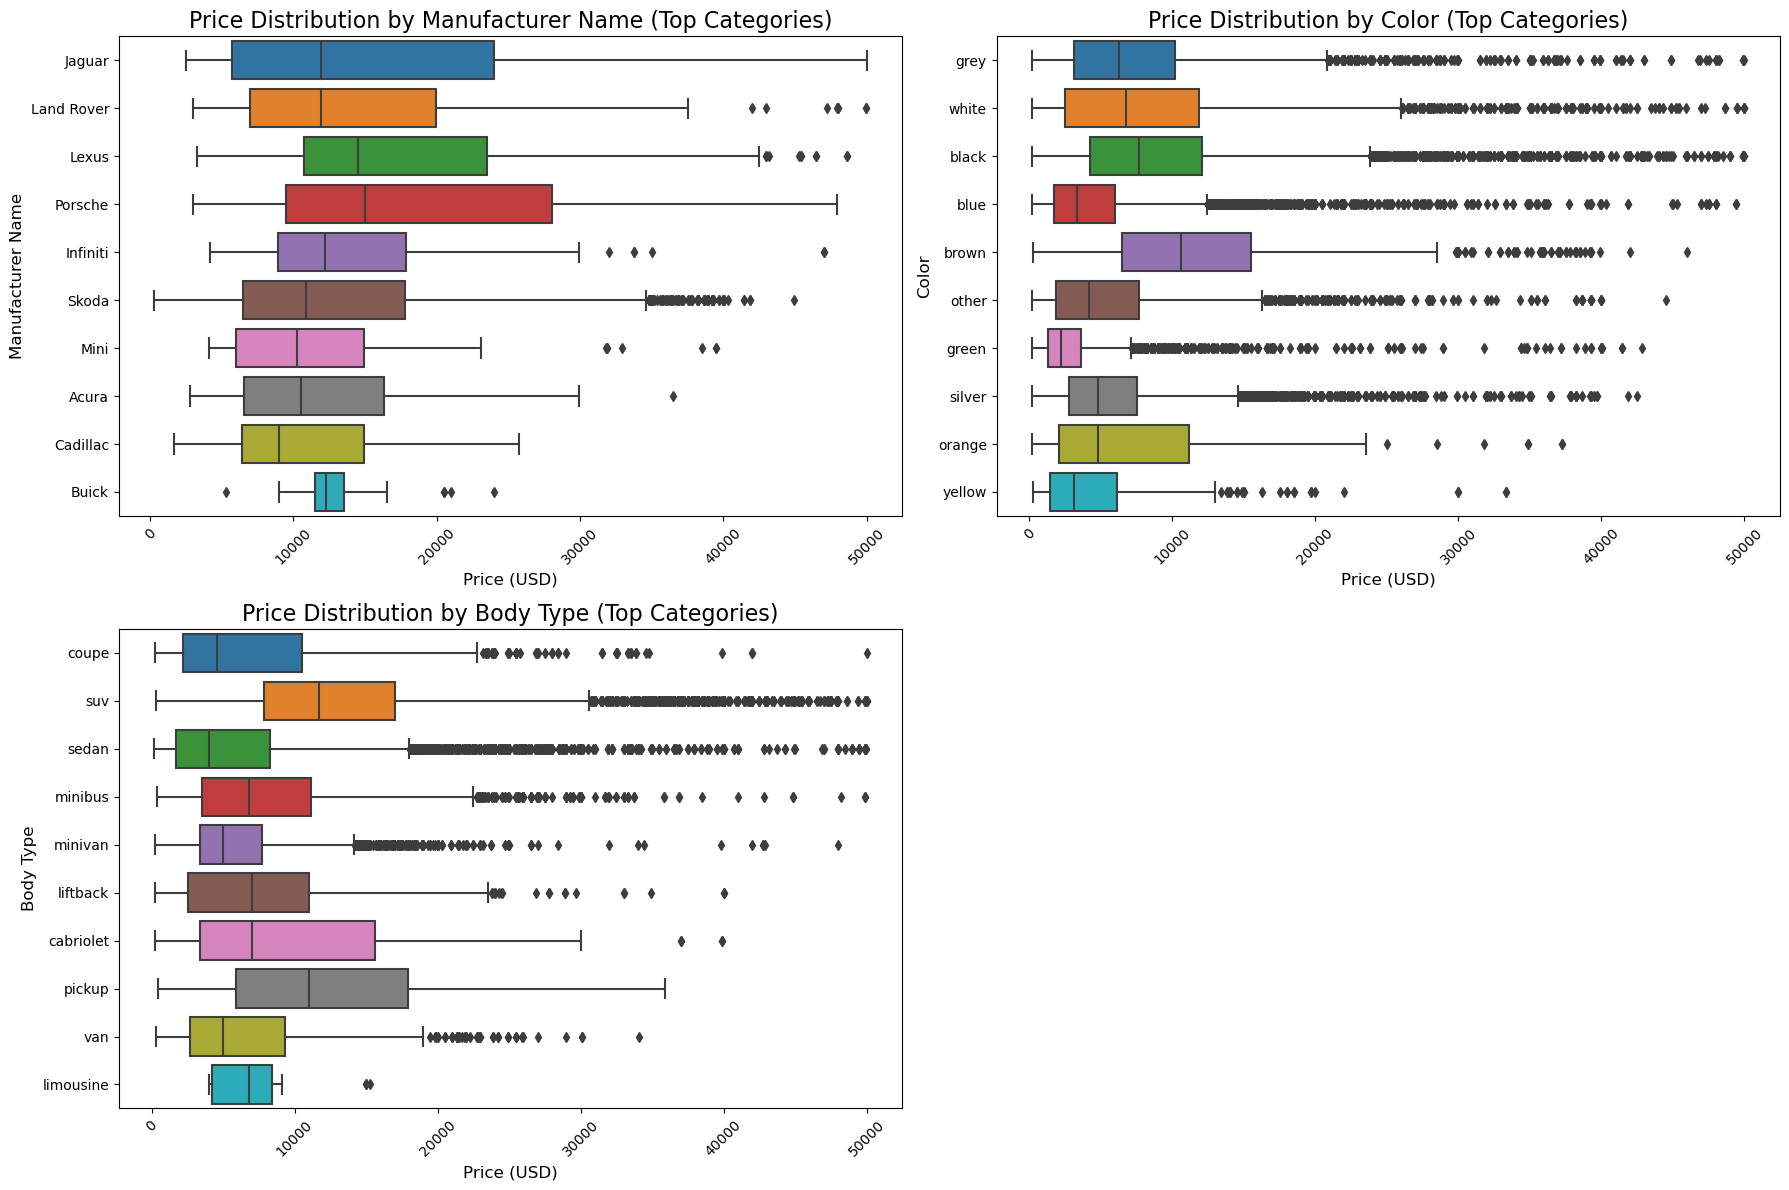

In [36]:
# Function to limit the number of categories displayed in the box plot
def limit_categories(data, column, limit=10):
    top_categories = data.groupby(column)['price_usd'].median().sort_values(ascending=False).head(limit).index
    data_limited = data[data[column].isin(top_categories)]
    return data_limited

# List of categorical features
categorical_features = ['manufacturer_name', 'color', 'body_type']

# Set up the matplotlib figure
plt.figure(figsize=(18, 12))

# Limit the number of categories and create box plots for each categorical feature
for i, feature in enumerate(categorical_features, start=1):
    data_limited = limit_categories(data_transformed, feature)
    plt.subplot(2, 2, i)
    sns.boxplot(x='price_usd', y=feature, data=data_limited.sort_values('price_usd', ascending=False))
    plt.title(f'Price Distribution by {feature.replace("_", " ").title()} (Top Categories)', fontsize=16)
    plt.xlabel('Price (USD)', fontsize=12)
    plt.ylabel(f'{feature.replace("_", " ").title()}', fontsize=12)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Manufacturer Name**

* There is a wide variation in car prices across different manufacturers.
* Some manufacturers, like Mercedes-Benz and BMW, have a wider distribution of prices, indicating a mix of both low and high-priced cars.
* Other manufacturers, like Daewoo and ZAZ, tend to have lower car prices.

**Color**

* The distribution of car prices doesn't vary significantly across different colors.
* However, there are some colors like purple and pink that tend to have lower median prices.

**Body Type**

* Different body types have different price distributions.
* For example, SUVs and convertibles tend to have higher median prices, while sedans and hatchbacks tend to have lower median prices.


In [38]:
# Function to perform ANOVA and return the results
def perform_anova(data, target, categorical_feature):
    # Grouping the data based on categories and creating a list of arrays
    grouped_data = [group[target].values for name, group in data.groupby(categorical_feature)]
    
    # Performing ANOVA
    f_statistic, p_value = f_oneway(*grouped_data)
    return f_statistic, p_value

# Performing ANOVA for each categorical feature
anova_results = {}
for feature in categorical_features:
    if feature in data_train.columns:
        f_statistic, p_value = perform_anova(data_train, 'price_usd', feature)
        anova_results[feature] = {'F-statistic': f_statistic, 'P-value': p_value}

anova_results


{'manufacturer_name': {'F-statistic': 207.90236507576859, 'P-value': 0.0},
 'color': {'F-statistic': 555.9458809035775, 'P-value': 0.0},
 'body_type': {'F-statistic': 1243.7316394119932, 'P-value': 0.0}}

**Manufacturer Name**

* F-statistic: 207.7
* P-value: 0.0

**Color**

* F-statistic: 557.95
* P-value: 0.0

**Body Type**

* F-statistic: 1243.61
* P-value: 0.0

#### Interpretation

The F-statistic provides a measure of the ratio of variances between the groups to the variance within the groups. Larger values indicate a stronger evidence against the null hypothesis.

The P-value is used to determine the significance of the results. In all three cases, the p-value is 0.0, which is less than the typical alpha level of 0.05, leading us to reject the null hypothesis.

#### Conclusion

There are significant differences in the mean prices of cars across different categories of manufacturer_name, color, and body_type.

These categorical features have a statistically significant impact on the car price, making them important considerations for any predictive modeling.


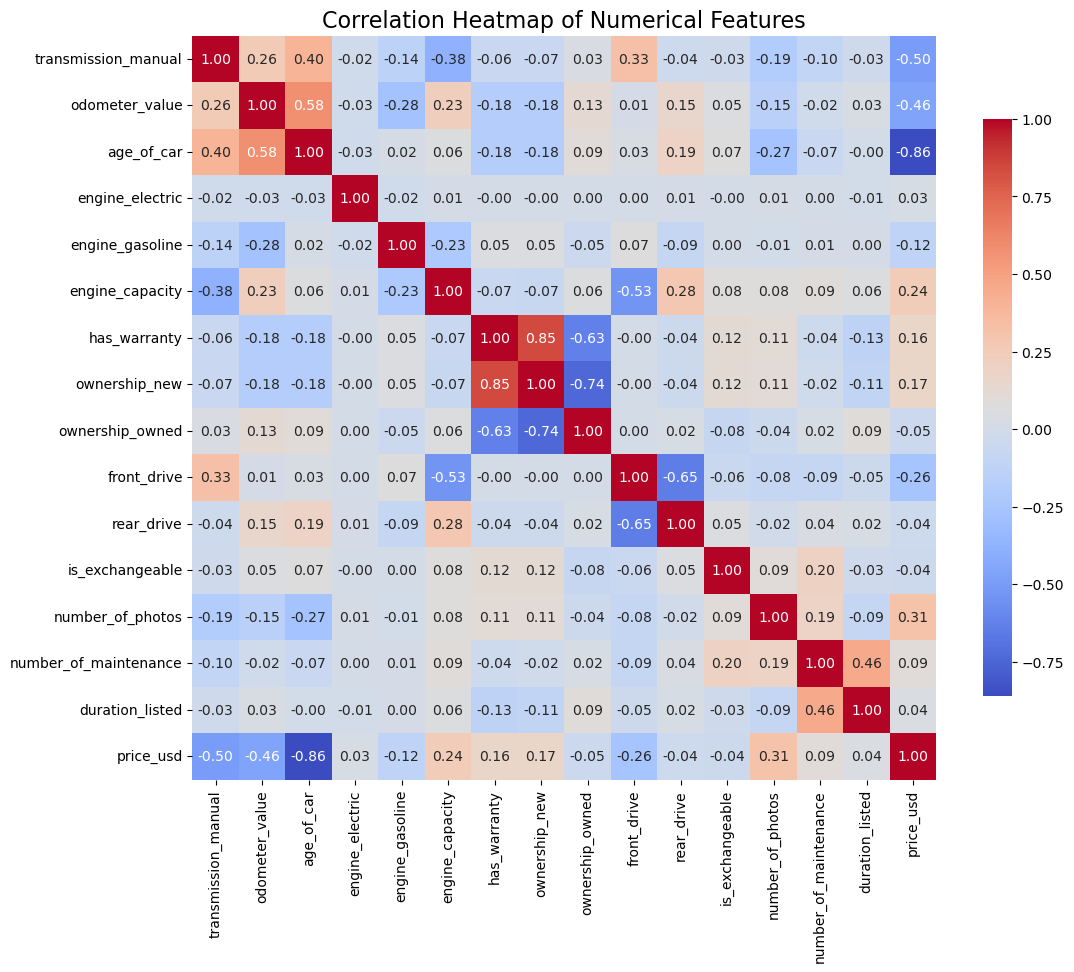

In [39]:
# Calculating the correlation matrix for numerical features
numerical_features = data_transformed.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_features.corr(method='spearman')

# Creating a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .75})
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()


<html>

<body>

<h4>Observations about Correlations</h4>

<p><strong>High Positive Correlation:</strong> There is a strong positive correlation between certain pairs of features:</p>
<ul>
    <li>Four_wheel_drive and all_drive (0.99)</li>
    <li>Engine_gasoline and engine_capacity (0.69)</li>
    <li>Number_of_photos and number_of_maintenance (0.61)</li>
</ul>
<p>These high correlations indicate a strong relationship and might be due to one feature being derived from or closely related to the other.</p>

<p><strong>High Negative Correlation:</strong> There is a strong negative correlation between:</p>
<ul>
    <li>Transmission_manual and engine_capacity (-0.61)</li>
</ul>
<p>This could be due to manual transmissions being more common in cars with smaller engine capacities.</p>

<p><strong>Other Correlations:</strong> Other features also show varying degrees of correlation with each other, providing insights into their relationships.</p>

</body>
</html>

In [40]:
list(data_train.columns)

['manufacturer_name',
 'transmission_manual',
 'color',
 'odometer_value',
 'age_of_car',
 'engine_electric',
 'engine_gasoline',
 'engine_capacity',
 'body_type',
 'has_warranty',
 'ownership_new',
 'ownership_owned',
 'front_drive',
 'rear_drive',
 'is_exchangeable',
 'number_of_photos',
 'number_of_maintenance',
 'duration_listed',
 'price_usd']

In [41]:
features_to_include = [
    'manufacturer_name',
    'transmission_manual',
    'color',
    'odometer_value',
    'age_of_car',
    'engine_capacity',
    'body_type',
    'has_warranty',
    'ownership_new',
    'front_drive',
    'number_of_photos',
    'number_of_maintenance',
    'duration_listed',
    'price_usd'
]

## Saving data into csv files for next step: Machine Learning

In [48]:
df_no_outliers=df_no_outliers.dropna()

In [50]:
df_no_outliers[features_to_include].to_csv('data_train_2.csv')

In [49]:
df_no_outliers_test.isna().sum()

manufacturer_name        0
transmission_manual      0
color                    0
odometer_value           0
age_of_car               0
engine_electric          0
engine_gasoline          0
engine_capacity          0
body_type                0
has_warranty             0
ownership_new            0
ownership_owned          0
front_drive              0
rear_drive               0
is_exchangeable          0
number_of_photos         0
number_of_maintenance    0
duration_listed          0
price_usd                0
dtype: int64

#### Let's make a similar dataframe to the testing dataset

In [51]:
# Identifying Outliers using IQR method for 'price_usd'
Q1 = data_transformed_test['price_usd'].quantile(0.25)
Q3 = data_transformed_test['price_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset for high-priced outliers
high_priced_outliers = data_transformed_test[data_transformed_test['price_usd'] > upper_bound]

# 1. Remove the high-priced outliers from the dataset
df_no_outliers_test = data_transformed_test[data_transformed_test['price_usd'] <= upper_bound]

# 2. Apply log transformation to the 'price_usd' column
df_no_outliers['price_usd'] = np.log(df_no_outliers_test['price_usd'])
df_no_outliers_test=df_no_outliers_test.dropna()
df_no_outliers[features_to_include].to_csv('data_test_2.csv')

In [44]:
data_transformed[features_to_include].to_csv('data_transformed_train.csv')
data_transformed_test[features_to_include].to_csv('data_transformed_test.csv')